# Лабораторная работа 205: Магнитное поле соленоида

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

n: int = 600
r_1: float = 4.25
mu_0: float = 4 * np.pi * 10**(-7)

frequency: int = 50

In [3]:
U_all = np.array([[44.1, 63.5, 84.1, 103.95, 119.3, 129.9, 138.6, 143.9, 147.2, 148.9, 150.1, 150.9, 150.8, 150.1, 148.8, 145.8, 141.9, 134.8, 125.3, 112.4, 92.9, 73.2, 52.7, 38.9, 26.8, 19.1, 14.9, 10.9, 8.6, 6.6, 5.3],
                [35.8, 49.7, 65.9, 81.7, 94.1, 103.01, 109.6, 113.5, 115.9, 117.0, 117.6, 118.1, 118.4, 117.8, 116.9, 115.5, 113.1, 108.1, 101.3, 92.7, 77.1, 61.9, 45.2, 32.8, 23.15, 17.1, 12.9, 9.9, 7.7, 5.9, 4.8],
                [62.4, 12.9, 1.4, 0.5, 0.42, 0.41, 0.4, 0.4, 0.4,0.4, 0.31, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.46, 1.9, 24.9, 67.9, 56.7, 40.1, 28.1, 20.4, 15.5, 11.7, 9.3]
                ]) * 10 ** -3

I1 = 1      # Для дерева и алюминия
I2 = 0.25   # Для стали
N = 3000    # Витки
R = 3.8     # Радиус (см)
L = 20      # Длина катушки

# перевели обратно в мВ, чтобы табличку отобразить
df = pd.DataFrame(np.transpose(U_all) * 1000, columns = ["Дерево, мВ", "Алюминий, мВ", "Сталь, мВ"])
df

,"Дерево, мВ","Алюминий, мВ","Сталь, мВ"
0,44.10,35.80,62.40
1,63.50,49.70,12.90
2,84.10,65.90,1.40
3,103.95,81.70,0.50
4,119.30,94.10,0.42
5,129.90,103.01,0.41
6,138.60,109.60,0.40
7,143.90,113.50,0.40
8,147.20,115.90,0.40
9,148.90,117.00,0.40


Sqrt[2] U
Defer[B  = ---------------]
       0       2      2
           2 Pi  n ν r  μ
                         0
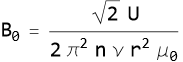

In [3]:
Defer[Subscript[B, 0] = (Sqrt[2]*U) / (2 * Pi^2 * n * \[Nu] * r^2 * Subscript[\[Mu], 0])]

N         l                L - l
Defer[B = μ  J --- (------------- + -------------------)]
           0   2 L        2    2                2    2
                    Sqrt[l  + R ]   Sqrt[(L - l)  + R ]
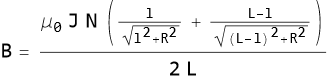

In [1]:
Defer[B = Subscript[\[Mu], 0] * J * N/(2 L) * (l/Sqrt[l^2 + R^2] + (L - l)/Sqrt[(L - l)^2 + R^2])]

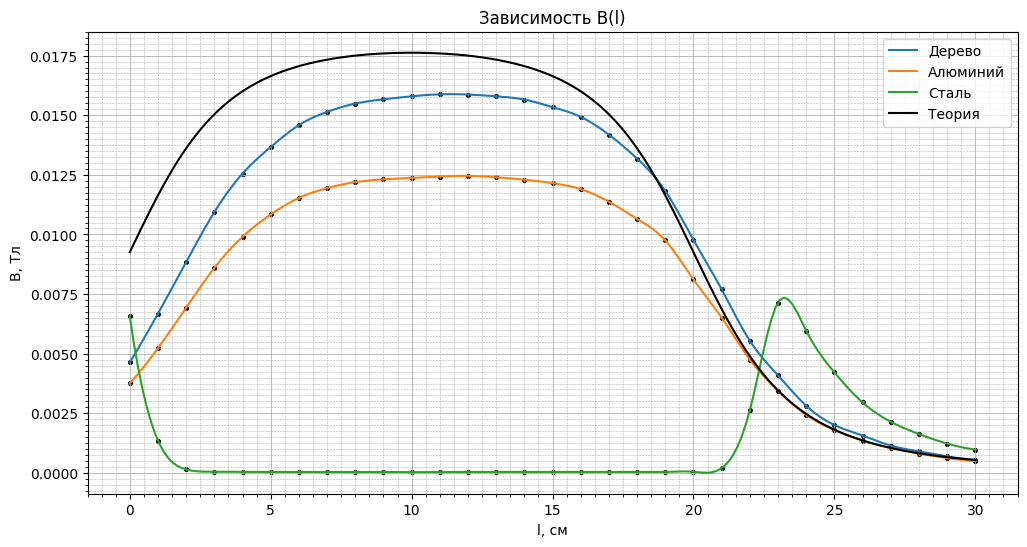

In [4]:
B_0 = U_all * 2**0.5 / (2 * np.pi**2 * n * frequency * r_1**2 * mu_0)

l_max: int = 30

fig, axs = polt.subplots(1, 1, figsize=(12, 6))
l_axis = np.linspace(0, l_max, 200)

axs.set_title("Зависимость B(l)")
axs.set_xlabel("l, см")
axs.set_ylabel("B, Тл")

# построение зависимостей для дерева, алюминия и стали
graphics_labels = np.array(["Дерево", "Алюминий", "Сталь"])
for i in range(len(graphics_labels)):
    cubic = interpolate.interp1d(range(0, l_max + 1), B_0[i], kind="cubic")
    B_axis = cubic(l_axis)
    axs.scatter(range(0, l_max + 1), B_0[i], s=7, color="black")
    axs.plot(l_axis, B_axis, label=graphics_labels[i])

# теоретическая зависимость маг. индукции от длины
B_axis = mu_0 * I1 * N/(2 *(L/100)) *(l_axis/(l_axis**2+R**2)**0.5 + (L-l_axis)/((L-l_axis)**2+R**2)**0.5)
axs.plot(l_axis, B_axis, label="Теория", color="black")

# легенда графиков
axs.legend()

# насечки на графике
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

# клеточки на фоне
polt.grid(which='minor', linestyle='--', linewidth=0.4)
polt.grid(which='major', linewidth=0.6)